<a href="https://colab.research.google.com/github/lalitha12-web/Telecom-Churn-Group-Case-Study/blob/main/Telecom_Churn_Group_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os

### For installing missingno library, type this command in terminal
#pip install missingno

import missingno as msno

#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [48]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
# read the data
filepath="/content/drive/MyDrive/IIITB-AIML/Telecom Churn Group Case Study/train.csv"
train_data= pd.read_csv(filepath)
filepath="/content/drive/MyDrive/IIITB-AIML/Telecom Churn Group Case Study/test.csv"
test_data= pd.read_csv(filepath)

In [50]:
# Display basic information about the training data
print("Shape of the training data:", train_data.shape)
print("\nFirst few rows of the training data:")
print(train_data.head())

Shape of the training data: (11652, 172)

First few rows of the training data:
   id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7  ...  sachet_3g_7  sachet_3g_8  fb_use

In [51]:
# Display basic information about the data
print("\nData Info:")
print(train_data.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Columns: 172 entries, id to churn_probability
dtypes: float64(161), int64(2), object(9)
memory usage: 15.3+ MB
None


In [52]:
# Describe the training data (numerical columns)
print("\nDescriptive statistics for numerical columns:")
print(train_data.describe())


Descriptive statistics for numerical columns:
                 id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  11652.000000    11652.0         11529.0         11529.0   
mean    5825.500000      109.0             0.0             0.0   
std     3363.787003        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%     2912.750000      109.0             0.0             0.0   
50%     5825.500000      109.0             0.0             0.0   
75%     8738.250000      109.0             0.0             0.0   
max    11651.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         11529.0  11652.000000  11652.000000  11652.000000  11181.000000   
mean              0.0    278.645233    272.108095    274.089862    129.351097   
std               0.0    303.971079    285.330325    293.805635    283.783235   
min               0.0  -2041.22800

In [53]:
# Check for unique values in each column
print("\nUnique values in each column:")
for col in train_data.columns:
    print(f"{col}: {train_data[col].nunique()}")



Unique values in each column:
id: 11652
circle_id: 1
loc_og_t2o_mou: 1
std_og_t2o_mou: 1
loc_ic_t2o_mou: 1
last_date_of_month_6: 1
last_date_of_month_7: 1
last_date_of_month_8: 1
arpu_6: 10913
arpu_7: 10890
arpu_8: 10680
onnet_mou_6: 6557
onnet_mou_7: 6471
onnet_mou_8: 6340
offnet_mou_6: 8457
offnet_mou_7: 8426
offnet_mou_8: 8227
roam_ic_mou_6: 1604
roam_ic_mou_7: 1275
roam_ic_mou_8: 1195
roam_og_mou_6: 1842
roam_og_mou_7: 1428
roam_og_mou_8: 1376
loc_og_t2t_mou_6: 4495
loc_og_t2t_mou_7: 4470
loc_og_t2t_mou_8: 4427
loc_og_t2m_mou_6: 6643
loc_og_t2m_mou_7: 6589
loc_og_t2m_mou_8: 6520
loc_og_t2f_mou_6: 1456
loc_og_t2f_mou_7: 1470
loc_og_t2f_mou_8: 1460
loc_og_t2c_mou_6: 878
loc_og_t2c_mou_7: 970
loc_og_t2c_mou_8: 981
loc_og_mou_6: 7518
loc_og_mou_7: 7489
loc_og_mou_8: 7388
std_og_t2t_mou_6: 3834
std_og_t2t_mou_7: 3847
std_og_t2t_mou_8: 3799
std_og_t2m_mou_6: 4697
std_og_t2m_mou_7: 4705
std_og_t2m_mou_8: 4622
std_og_t2f_mou_6: 723
std_og_t2f_mou_7: 678
std_og_t2f_mou_8: 682
std_og_t2c_mo

In [54]:
train_data.dtypes

,0
id,int64
circle_id,int64
loc_og_t2o_mou,float64
std_og_t2o_mou,float64
loc_ic_t2o_mou,float64
...,...
aon,float64
aug_vbc_3g,float64
jul_vbc_3g,float64
jun_vbc_3g,float64


In [55]:
# Check for missing values
print("\nMissing values in each column:")
print(train_data.isnull().sum())


Missing values in each column:
id                     0
circle_id              0
loc_og_t2o_mou       123
std_og_t2o_mou       123
loc_ic_t2o_mou       123
                    ... 
aon                    1
aug_vbc_3g             1
jul_vbc_3g             1
jun_vbc_3g             1
churn_probability      1
Length: 172, dtype: int64


 Preprocess the Training Data
Preprocessing Steps Include:

Handle Missing Values
Encode Categorical Variables
Scale Numerical Features

In [56]:
# Calculate the percentage of missing values for each column
missing_percentage = train_data.isnull().mean() * 100
print("Missing value percentages:")
print(missing_percentage)

Missing value percentages:
id                   0.000000
circle_id            0.000000
loc_og_t2o_mou       1.055613
std_og_t2o_mou       1.055613
loc_ic_t2o_mou       1.055613
                       ...   
aon                  0.008582
aug_vbc_3g           0.008582
jul_vbc_3g           0.008582
jun_vbc_3g           0.008582
churn_probability    0.008582
Length: 172, dtype: float64


In [57]:
# Identify columns with more than 40% missing values
cols_to_drop = missing_percentage[missing_percentage > 40].index
print("\nColumns to drop (missing > 40%):")
print(cols_to_drop)

# Drop these columns from the dataset
train_data_cleaned = train_data.drop(columns=cols_to_drop)
train_data_cleaned.shape


Columns to drop (missing > 40%):
Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object')


(11652, 142)

Replace Missing Values with Mode for Remaining Columns

In [58]:
from sklearn.impute import SimpleImputer

# Identify remaining columns with missing values
remaining_missing = train_data_cleaned.isnull().sum()
cols_with_missing = remaining_missing[remaining_missing > 0].index

print("\nColumns with missing values to replace with mode:")
print(cols_with_missing)

# Initialize imputer for categorical columns
mode_imputer = SimpleImputer(strategy='most_frequent')

# Replace missing values with mode
train_data_cleaned[cols_with_missing] = mode_imputer.fit_transform(train_data_cleaned[cols_with_missing])

# Verify no missing values remain
print("\nMissing values after imputation:")
print(train_data_cleaned.isnull().sum())



Columns with missing values to replace with mode:
Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_7', 'last_date_of_month_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'churn_probability'],
      dtype='object', length=133)

Missing values after imputation:
id                   0
circle_id            0
loc_og_t2o_mou       0
std_og_t2o_mou       0
loc_ic_t2o_mou       0
                    ..
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
churn_probability    0
Length: 142, dtype: int64


Drop Columns with Single Unique Values

In [59]:
# Drop columns with a single unique value
single_value_cols = [col for col in train_data_cleaned.columns if train_data_cleaned[col].nunique() == 1]
print("\nColumns with a single unique value:")
print(single_value_cols)

# Drop these columns
train_data_cleaned = train_data_cleaned.drop(columns=single_value_cols)

# Verify the shape of the data after dropping columns
print("\nShape of the data after dropping single unique value columns:", train_data_cleaned.shape)


Columns with a single unique value:
['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']

Shape of the data after dropping single unique value columns: (11652, 129)


Steps for Encoding Categorical Variables

In [60]:
# Identify categorical columns
categorical_cols = train_data_cleaned.select_dtypes(include=['object']).columns
print("\nCategorical columns:")
print(categorical_cols)
print(train_data_cleaned.head())



Categorical columns:
Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'churn_probability'],
      dtype='object', length=122)
   id   arpu_6   arpu_7   arpu_8 onnet_mou_6 onnet_mou_7 onnet_mou_8  \
0   0   31.277   87.009    7.527       48.58      124.38        1.29   
1   1    0.000  122.787   42.953         0.0         0.0         0.0   
2   2   60.806  103.176    0.000        0.53       15.93         0.0   
3   3  156.362  205.260  111.095        7.26       16.01         0.0   
4   4  240.708  128.191  101.565       21.28        4.83        6.13   

  offnet_mou_6 offnet_mou_7 offnet_mou_8  ... monthly_3g_7 monthly_3g_8  \
0        32.24        96.68         2.33  ...          0.0          0.0   

In [61]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoders = {col: LabelEncoder() for col in categorical_cols}

# Apply Label Encoding
for col in categorical_cols:
    train_data_cleaned[col] = label_encoders[col].fit_transform(train_data_cleaned[col])

print("\nFirst few rows of the data after Label Encoding:")
print(train_data_cleaned.head())



First few rows of the data after Label Encoding:
   id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   0   31.277   87.009    7.527         2340         3932           96   
1   1    0.000  122.787   42.953            0            0            0   
2   2   60.806  103.176    0.000           35         1003            0   
3   3  156.362  205.260  111.095          484         1007            0   
4   4  240.708  128.191  101.565         1236          360          433   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  ...  monthly_3g_7  monthly_3g_8  \
0          1323          3475           141  ...             0             0   
1             0          1146          1297  ...             1             0   
2          2119          3058             0  ...             0             0   
3          2585          2956          1980  ...             0             0   
4          2212          1598           470  ...             0             0   

   sachet_3g_6  sa

In [83]:
# Separate features and target variable
X_train = train_data_cleaned.drop(columns=['churn_probability'])  # Replace 'target' with your actual target column name
y_train = train_data_cleaned['churn_probability']  # Replace 'target' with your actual target column name
# Split the training data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


Feature scaling

In [80]:
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Convert the scaled data back to a DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

print("\nFirst few rows of the scaled training data:")
print(X_train_scaled.head())


First few rows of the scaled training data:
         id    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0  0.000000  0.152989  0.252819  0.142415     0.356925     0.607728   
1  0.000086  0.150680  0.259390  0.147707     0.000000     0.000000   
2  0.000172  0.155169  0.255788  0.141291     0.005339     0.155023   
3  0.000257  0.162223  0.274535  0.157887     0.073826     0.155641   
4  0.000343  0.168449  0.260382  0.156463     0.188530     0.055641   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  ...  monthly_3g_6  \
0     0.015144      0.156457      0.412463      0.017141  ...           0.0   
1     0.000000      0.000000      0.136024      0.157671  ...           0.0   
2     0.000000      0.250591      0.362967      0.000000  ...           0.0   
3     0.000000      0.305700      0.350861      0.240700  ...           0.0   
4     0.068307      0.261589      0.189674      0.057136  ...           0.0   

   monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g

Calculate Correlation Matrix

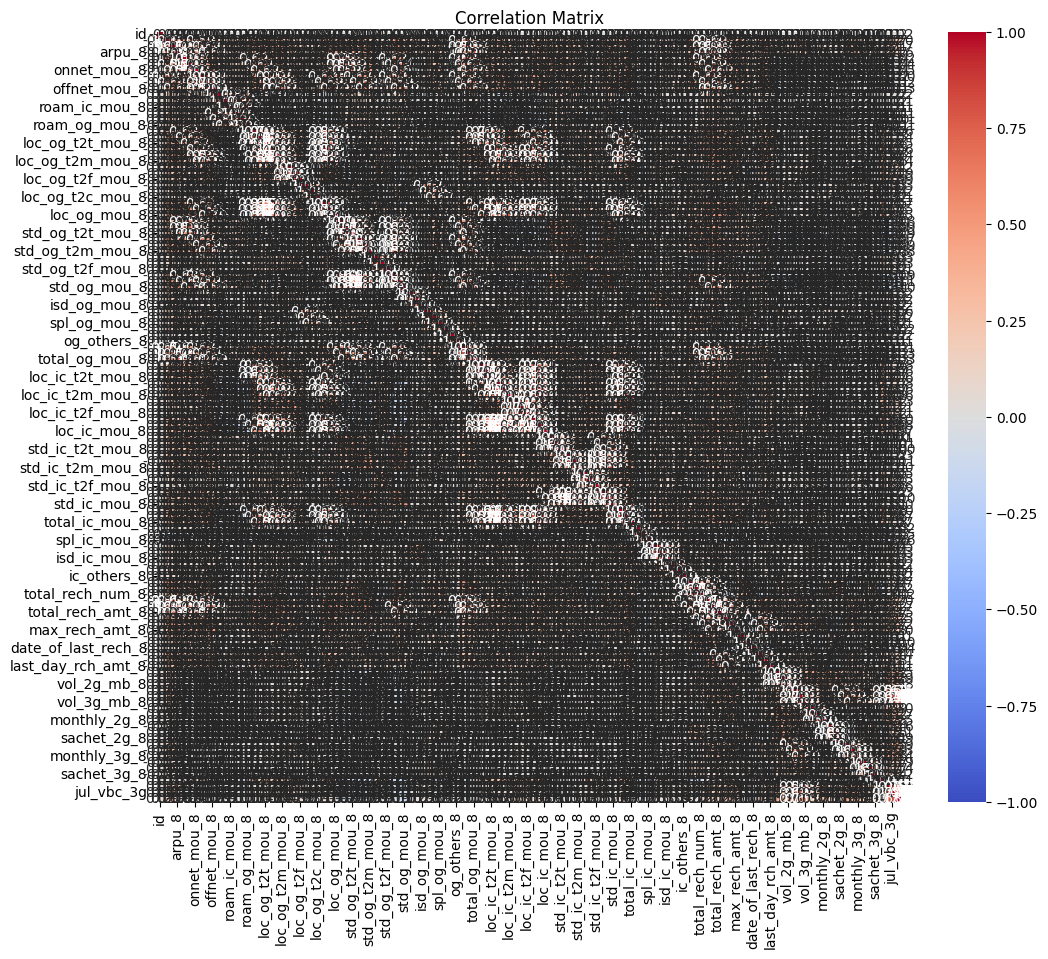

In [64]:
# Calculate the correlation matrix
correlation_matrix = X_train_scaled.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [65]:
# Define correlation threshold
threshold = 0.8

# Find indices of highly correlated features
highly_correlated_pairs = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_pairs.add((colname, correlation_matrix.columns[j]))

print("\nHighly Correlated Feature Pairs:")
print(highly_correlated_pairs)



Highly Correlated Feature Pairs:
{('loc_ic_mou_8', 'loc_ic_mou_7'), ('loc_og_mou_8', 'loc_og_t2t_mou_8'), ('std_og_mou_6', 'std_og_t2m_mou_6'), ('std_ic_mou_8', 'std_ic_t2m_mou_8'), ('loc_og_mou_6', 'loc_og_t2m_mou_6'), ('std_og_mou_7', 'std_og_t2m_mou_7'), ('total_rech_amt_7', 'arpu_7'), ('total_rech_amt_6', 'arpu_6'), ('loc_og_mou_7', 'loc_og_t2m_mou_7'), ('std_ic_mou_6', 'std_ic_t2m_mou_6'), ('total_ic_mou_7', 'loc_ic_t2m_mou_7'), ('loc_ic_t2m_mou_8', 'loc_ic_t2m_mou_7'), ('total_ic_mou_6', 'loc_ic_mou_6'), ('total_rech_amt_8', 'arpu_8'), ('roam_og_mou_7', 'roam_ic_mou_7'), ('std_og_mou_6', 'std_og_t2t_mou_6'), ('std_og_mou_7', 'std_og_t2t_mou_7'), ('loc_ic_mou_7', 'loc_ic_mou_6'), ('total_ic_mou_8', 'total_ic_mou_7'), ('loc_og_mou_8', 'loc_og_t2m_mou_8'), ('total_ic_mou_8', 'loc_ic_t2m_mou_8'), ('loc_ic_mou_8', 'loc_ic_t2m_mou_8'), ('loc_og_mou_8', 'loc_og_mou_7'), ('loc_ic_mou_7', 'loc_ic_t2m_mou_7'), ('roam_og_mou_8', 'roam_ic_mou_8'), ('loc_og_t2t_mou_8', 'loc_og_t2t_mou_7'), (

In [66]:
# Create a set of columns to drop
cols_to_drop = set()
for col1, col2 in highly_correlated_pairs:
    # Keep the column with fewer missing values or based on domain knowledge
    cols_to_drop.add(col2)  # Example: dropping the second column

# Drop highly correlated columns
X_train_reduced = X_train_scaled.drop(columns=cols_to_drop)


print("\nColumns dropped due to high correlation:")
print(cols_to_drop)

print("\nShape of the reduced training data:")
print(X_train_reduced.shape)




Columns dropped due to high correlation:
{'std_ic_t2m_mou_8', 'loc_ic_mou_8', 'loc_og_t2m_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_mou_7', 'std_og_t2m_mou_8', 'loc_ic_mou_6', 'roam_ic_mou_8', 'std_og_t2m_mou_7', 'loc_ic_t2m_mou_7', 'total_ic_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'arpu_6', 'arpu_8', 'loc_ic_t2m_mou_8', 'loc_og_t2t_mou_6', 'std_ic_t2m_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_6', 'loc_og_t2t_mou_8', 'std_og_t2t_mou_7', 'std_ic_t2m_mou_6', 'std_og_t2m_mou_6', 'loc_og_mou_7', 'roam_ic_mou_7', 'arpu_7', 'loc_og_t2t_mou_7', 'roam_ic_mou_6'}

Shape of the reduced training data:
(9321, 99)


In [67]:
from sklearn.metrics import accuracy_score
# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Fit the model
log_reg.fit(X_train_reduced, y_train)

# Make predictions on the training data
y_train_pred = log_reg.predict(X_train_reduced)
# Calculate the accuracy on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)

print("\nTraining Accuracy of the Logistic Regression Model:")
print(train_accuracy)


Training Accuracy of the Logistic Regression Model:
0.9281193005042377


### Preparing Unseen Data

Missing value percentages:
id                 0.000000
circle_id          0.000000
loc_og_t2o_mou     1.080988
std_og_t2o_mou     1.080988
loc_ic_t2o_mou     1.080988
                    ...    
fb_user_8         73.564402
aon                0.005720
aug_vbc_3g         0.005720
jul_vbc_3g         0.005720
jun_vbc_3g         0.005720
Length: 171, dtype: float64


In [70]:
# Identify columns with more than 40% missing values
cols_to_drop = missing_percentage[missing_percentage > 40].index
print("\nColumns to drop (missing > 40%):")
print(cols_to_drop)


Columns to drop (missing > 40%):
Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object')


In [71]:
# Drop these columns from the dataset
test_data_cleaned = test_data.drop(columns=cols_to_drop)
test_data_cleaned.shape

(17484, 141)

In [72]:
from sklearn.impute import SimpleImputer

# Identify remaining columns with missing values
remaining_missing = test_data_cleaned.isnull().sum()
cols_with_missing = remaining_missing[remaining_missing > 0].index

print("\nColumns with missing values to replace with mode:")
print(cols_with_missing)

# Initialize imputer for categorical columns
mode_imputer = SimpleImputer(strategy='most_frequent')

# Replace missing values with mode
test_data_cleaned[cols_with_missing] = mode_imputer.fit_transform(test_data_cleaned[cols_with_missing])

# Verify no missing values remain
print("\nMissing values after imputation:")
print(test_data_cleaned.isnull().sum())

# Drop columns with a single unique value
single_value_cols = [col for col in test_data_cleaned.columns if test_data_cleaned[col].nunique() == 1]
print("\nColumns with a single unique value:")
print(single_value_cols)

# Drop these columns
test_data_cleaned = test_data_cleaned.drop(columns=single_value_cols)

# Verify the shape of the data after dropping columns
print("\nShape of the data after dropping single unique value columns:", test_data_cleaned.shape)


Columns with missing values to replace with mode:
Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_7', 'last_date_of_month_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       ...
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g'],
      dtype='object', length=129)

Missing values after imputation:
id                0
circle_id         0
loc_og_t2o_mou    0
std_og_t2o_mou    0
loc_ic_t2o_mou    0
                 ..
sachet_3g_8       0
aon               0
aug_vbc_3g        0
jul_vbc_3g        0
jun_vbc_3g        0
Length: 141, dtype: int64

Columns with a single unique value:
['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'st

In [73]:
# Identify categorical columns
categorical_cols = test_data_cleaned.select_dtypes(include=['object']).columns
print("\nCategorical columns:")
print(categorical_cols)
print(test_data_cleaned.head())


Categorical columns:
Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6',
       ...
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g'],
      dtype='object', length=118)
      id   arpu_6   arpu_7   arpu_8 onnet_mou_6 onnet_mou_7 onnet_mou_8  \
0  69999   91.882   65.330   64.445       31.78       20.23       23.11   
1  70000  414.168  515.568  360.868       75.51       41.21       19.84   
2  70001  329.844  434.884  746.239        7.54        7.86         8.4   
3  70002   43.550  171.390   24.400        5.31        2.16         0.0   
4  70003  306.854  406.289  413.329      450.93      609.03      700.68   

  offnet_mou_6 offnet_mou_7 offnet_mou_8  ... monthly_3g_6 monthly_3g_7  \
0        60.16        32.16        34.83  ...          0.0   

In [74]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoders = {col: LabelEncoder() for col in categorical_cols}

# Apply Label Encoding
for col in categorical_cols:
    test_data_cleaned[col] = label_encoders[col].fit_transform(test_data_cleaned[col])

print("\nFirst few rows of the data after Label Encoding:")
print(test_data_cleaned.head())


First few rows of the data after Label Encoding:
      id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  69999   91.882   65.330   64.445         1907         1310         1447   
1  70000  414.168  515.568  360.868         3701         2360         1273   
2  70001  329.844  434.884  746.239          548          567          610   
3  70002   43.550  171.390   24.400          391          167            0   
4  70003  306.854  406.289  413.329         7570         7766         7798   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  ...  monthly_3g_6  monthly_3g_7  \
0          2835          1653          1773  ...             0             0   
1          9776         10202          8991  ...             0             0   
2           900          2279          2215  ...             0             0   
3          1957          6967          1260  ...             0             0   
4          2868          1259          3410  ...             0             0   



In [81]:
X_test=test_data_cleaned

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

### Apply Model on unseen data

In [82]:
# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_test_pred = log_reg.predict(X_test_scaled)

# Convert predictions to a DataFrame for easier handling
y_test_pred_df = pd.DataFrame(y_test_pred, columns=['Predicted'])

print("\nFirst few predictions on the test data:")
print(y_test_pred_df.head())


First few predictions on the test data:
   Predicted
0          0
1          0
2          1
3          0
4          0


In [89]:
from sklearn.compose import ColumnTransformer
# Define categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=['number']).columns

# Define preprocessing for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
            ('scaler', StandardScaler())  # Standardize numerical features
        ]), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with mode
            ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
        ]), categorical_cols)
    ])

# Define the full pipeline without PCA
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000, tol=0.001))  # Logistic Regression model
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Calculate training accuracy
train_score = pipe.score(X_train, y_train)
print("Training accuracy:", train_score)



Training accuracy: 0.9322863027806385


In [95]:

# Prepare the submission data
submission_data = test_data.copy()  # Use the test data as-is for prediction

# Save the 'id' column before dropping it
ids = submission_data['id']

# Drop 'id' column for prediction
X_test_features = submission_data.drop(columns=['id'])

# Predict probabilities for the unseen test data
churn_probabilities = pipe.predict_proba(X_test_features)[:, 1]  # Probability of class 1 (churn)

# Add churn_probability to the original test data
submission_data['churn_probability'] = churn_probabilities

# Reattach 'id' column and create the output DataFrame
output = pd.DataFrame({
    'id': ids,
    'churn_probability': submission_data['churn_probability']
})

# Save to CSV
output.to_csv('submission_lr_13jul.csv', index=False)

print("Predictions with churn probabilities have been saved to 'submission_lr_13jul.csv'.")

KeyError: "['id'] not in index"